# Validation, regularisation, callbacks

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [2]:
print(tf.__version__)

2.10.0


In [3]:
# GPU Status...
print(tf.config.experimental.list_physical_devices('GPU'))
print(tf.config.experimental.get_memory_info('GPU:0'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
{'current': 0, 'peak': 0}


## Validation sets

### Load the data

In [5]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [8]:
print(diabetes_dataset.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [10]:
# save input and target variables
data = diabetes_dataset['data']
targets = diabetes_dataset['target']

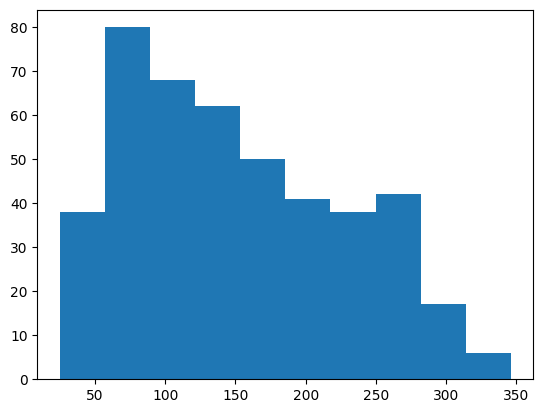

In [12]:
import matplotlib.pyplot as plt
plt.hist(targets)
plt.show() 

In [14]:
# normalize the target - this will make clearer training curves
targets = (targets - targets.mean(axis=0)) / targets.std()

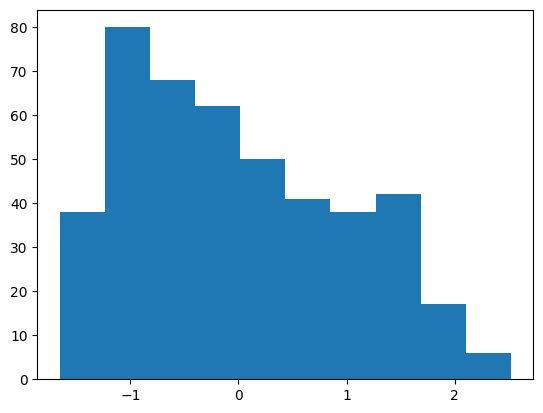

In [15]:
import matplotlib.pyplot as plt
plt.hist(targets)
plt.show() 

In [23]:
# split into train and test
from sklearn.model_selection import train_test_split
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)


(397, 10)
(45, 10)
(397,)
(45,)


In [27]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    return model
        
model = get_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               1408      
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dense_13 (Dense)            (None, 1)                

In [29]:
# compile the model
model.compile(optimizer='adam', loss='mse', metrics='mae')

In [30]:
# train the model with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs=100,
                   validation_split=0.15, batch_size=64, verbose=False)

In [31]:
model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.4913 - mae: 0.5416 - 17ms/epoch - 8ms/step


[0.49129122495651245, 0.5415557026863098]

### Plot the learning curves

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


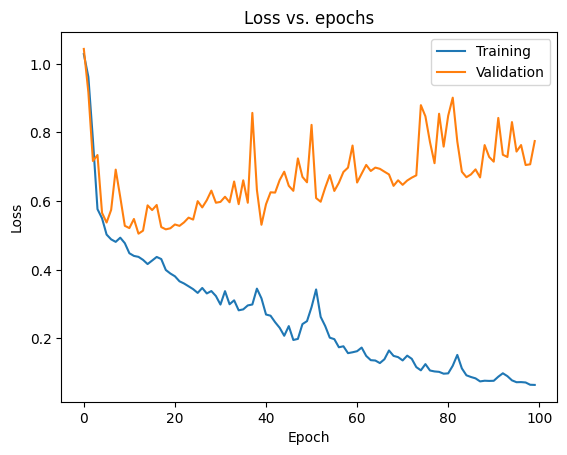

In [36]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

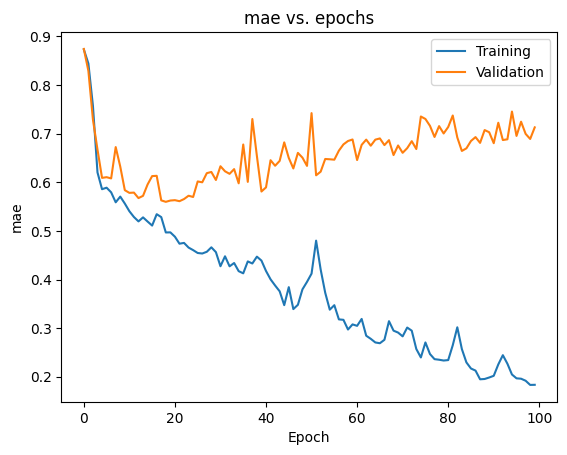

In [40]:
# Plot the training and validation mae

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('mae vs. epochs')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()